<a href="https://colab.research.google.com/github/saivenkat2309/ML_A1/blob/main/Ass_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
df = pd.read_csv('/content/sample_data/Housing.csv')

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [78]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [79]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df[input_features + [output_feature]], train_size = 0.8, test_size = 0.2,random_state = 100)

In [80]:
X_train = df_train[input_features].to_numpy()
y_train = df_train[output_feature].to_numpy()
X_val = df_test[input_features].to_numpy()
y_val = df_test[output_feature].to_numpy()

In [81]:
def Linear_Regression(X_train, y_train, X_val, y_val, epochs, alpha, lambdaa = 0):
  training_loss = []
  validation_loss = []

  m, n = X_train.shape
  np.random.seed(0)
  theta = np.random.randn(n+1,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
  y_train = y_train.reshape(m,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  for iteration in range(epochs):
      gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambdaa * np.concatenate((np.zeros((1,1)), theta[1:])))
      theta -= alpha * gradients

      train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:])))
      val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

      training_loss.append(train_loss)
      validation_loss.append(val_loss)
  return theta, training_loss, validation_loss

In [82]:
theta_alpha_1, train_loss_alpha_1, val_loss_alpha_1  = Linear_Regression(X_train, y_train, X_val, y_val,1000, alpha = 0.000000001)
theta_alpha_2, train_loss_alpha_2, val_loss_alpha_2  = Linear_Regression(X_train, y_train, X_val, y_val,20, alpha = 0.1)

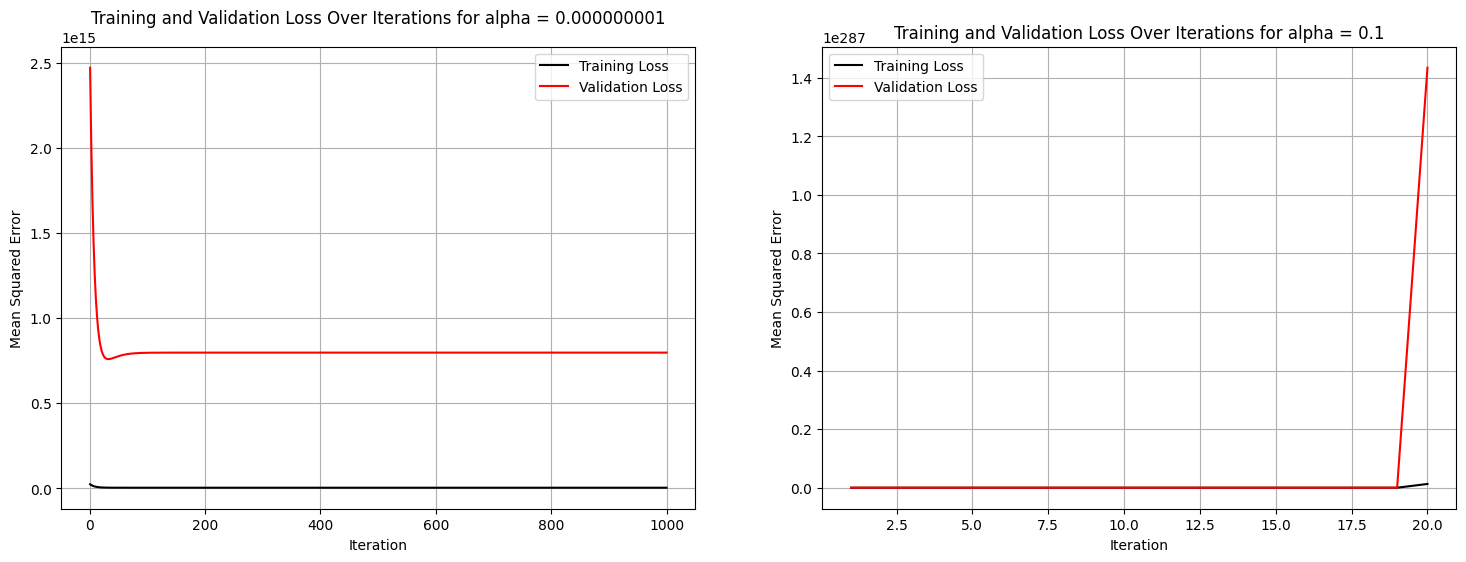

In [84]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_1) + 1), train_loss_alpha_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_1) + 1), val_loss_alpha_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.000000001")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_2) + 1), train_loss_alpha_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_2) + 1), val_loss_alpha_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [85]:
theta_alpha_1


array([[ 2.62842214e+00],
       [ 8.61910102e+02],
       [ 4.12883653e+00],
       [ 4.02208963e+00],
       [ 4.57767673e+00],
       [-2.91553097e-01]])

In [86]:
input_features_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features_2 = 'price'

In [87]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [88]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  0 non-null      float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [90]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_2, df_test_2 = train_test_split(df[input_features_2 + [output_features_2]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [91]:
X_train_2 = df_train_2[input_features_2].to_numpy()
y_train_2 = df_train_2['price'].to_numpy()
X_val_2 = df_test_2[input_features_2].to_numpy()
y_val_2 = df_test_2['price'].to_numpy()


In [93]:
theta_alpha_3, train_loss_alpha_3, val_loss_alpha_3  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha =  0.00000001)
print("Done 1")
theta_alpha_4, train_loss_alpha_4, val_loss_alpha_4  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha = 0.1)

Done 1


<ipython-input-81-68c0dca8266c>:18: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:])))
<ipython-input-81-68c0dca8266c>:19: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))


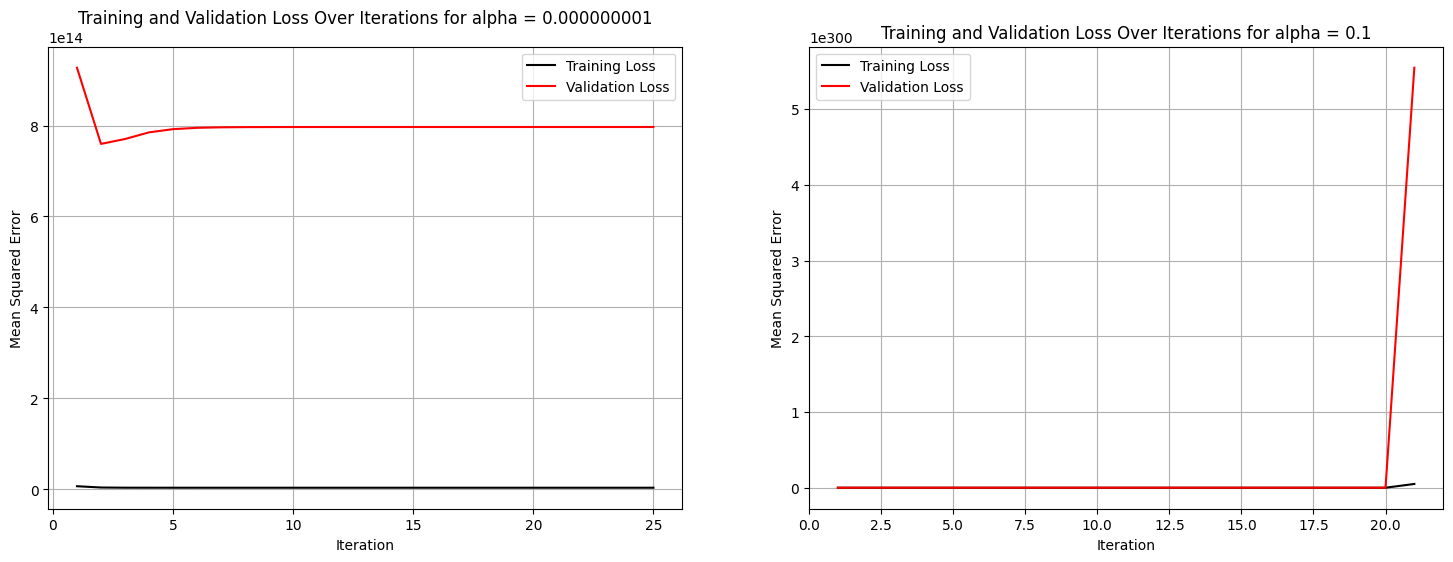

In [95]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_3) + 1), train_loss_alpha_3, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_3) + 1), val_loss_alpha_3, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.000000001")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_4) + 1), train_loss_alpha_4, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_4) + 1), val_loss_alpha_4, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [96]:
theta_alpha_3

array([[ 2.08707562e+00],
       [ 8.61911892e+02],
       [ 2.08510753e+00],
       [ 2.82847596e+00],
       [ 2.74212176e+00],
       [-6.93315604e-01],
       [ 1.04794194e+00],
       [ 9.13960081e-03],
       [-6.15624484e-02],
       [ 6.12772264e-01],
       [ 4.06737784e-01],
       [ 1.56620179e+00]])

In [97]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer_input = MinMaxScaler()
standardizer_input = StandardScaler()
normalizer_output = MinMaxScaler()
standardizer_output = StandardScaler()

X_train_normalize = normalizer_input.fit_transform(df_train[input_features])
y_train_normalize = normalizer_output.fit_transform(df_train[[output_feature]])

X_test_normalize = normalizer_input.transform(df_test[input_features])
y_test_normalize = normalizer_output.transform(df_test[[output_feature]])

X_train_standard = normalizer_input.fit_transform(df_train[input_features])
y_train_standard = standardizer_output.fit_transform(df_train[[output_feature]])

X_test_standard = normalizer_input.transform(df_test[input_features])
y_test_standard = standardizer_output.transform(df_test[[output_feature]])



In [99]:
theta_alpha_normal_input, train_loss_alpha_normal_input, val_loss_alpha_normal_input = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val ,2000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_input_1, train_loss_alpha_normal_input_1, val_loss_alpha_normal_input_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val, 2000, alpha = 0.1)

theta_alpha_normal, train_loss_alpha_normal, val_loss_alpha_normal = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize ,2000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_1, train_loss_alpha_normal_1, val_loss_alpha_normal_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize, 2000, alpha = 0)

Done 1
Done 1


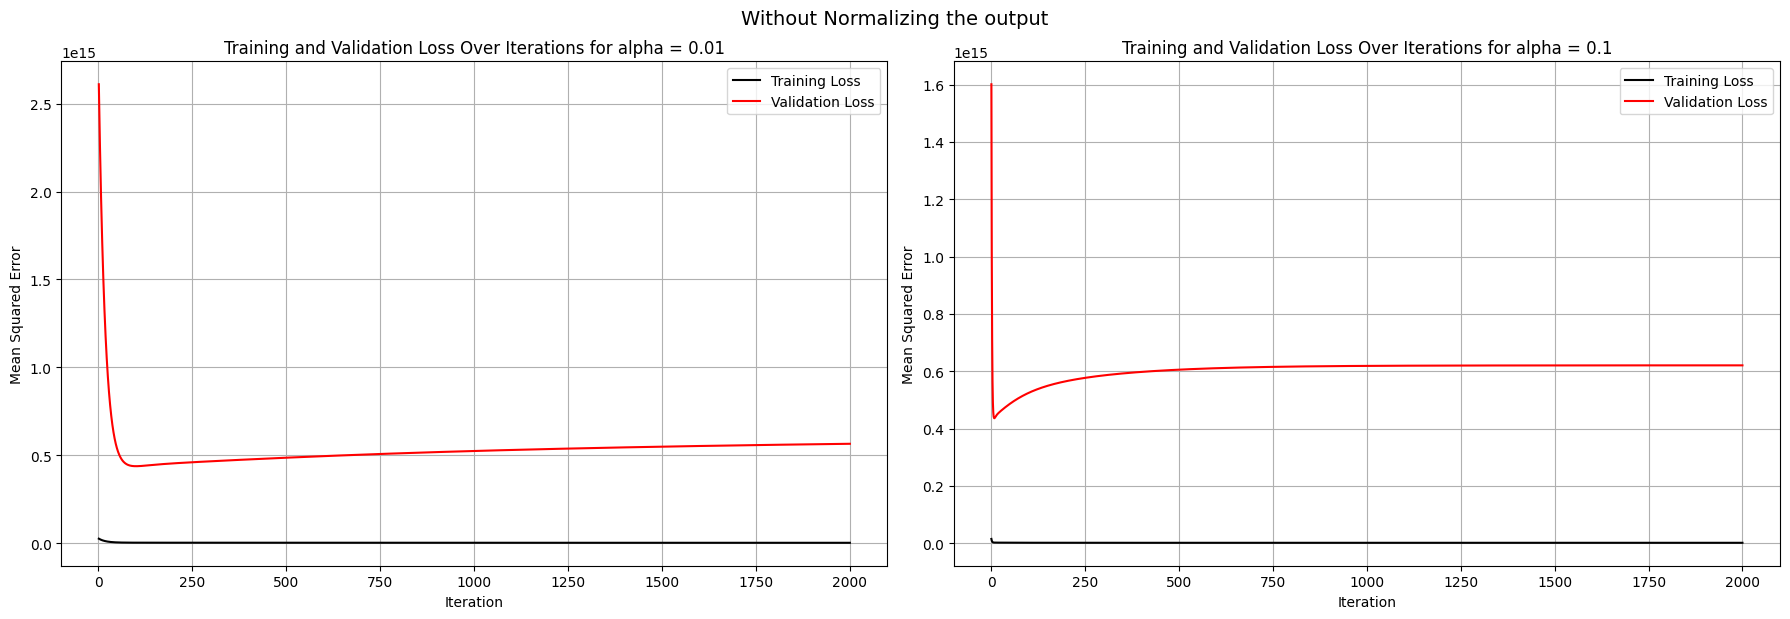

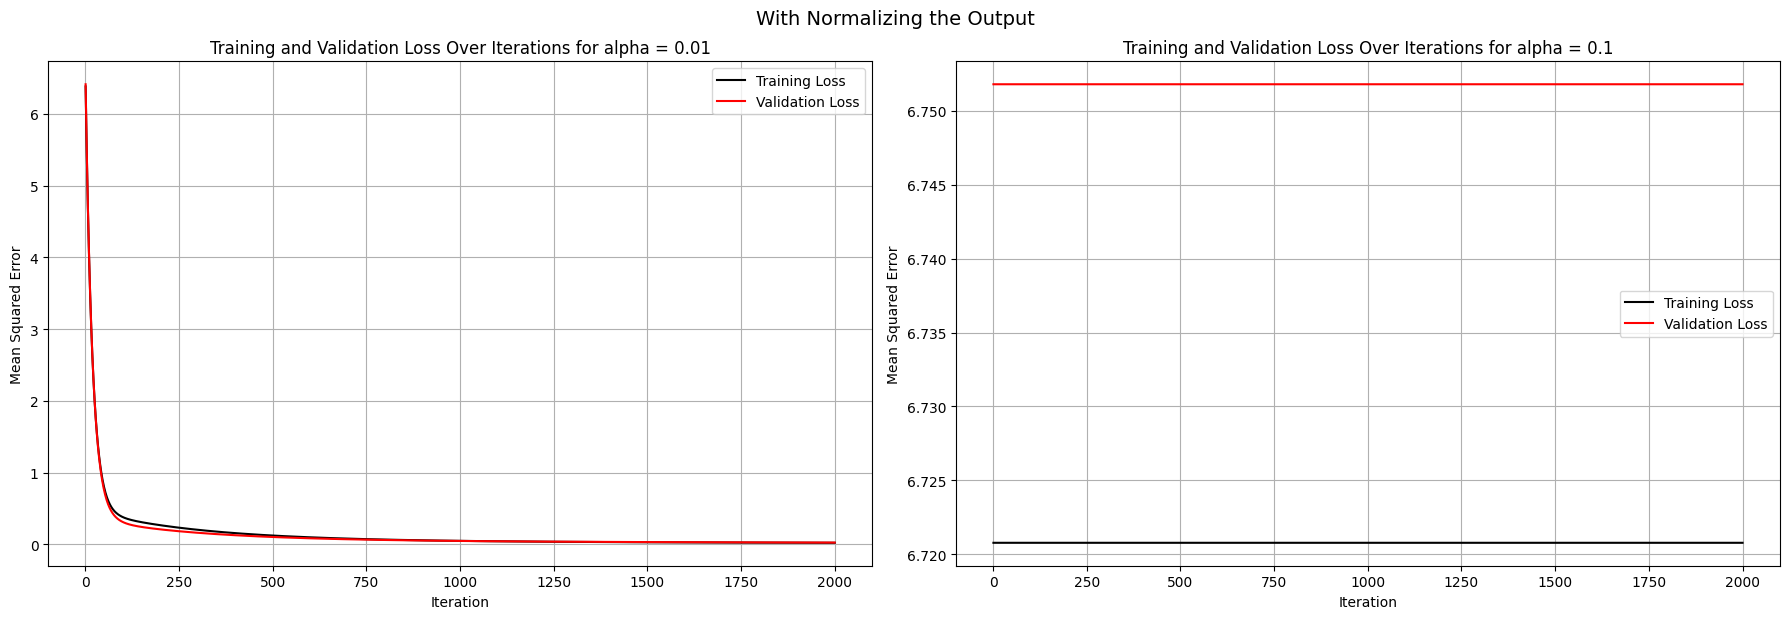

In [102]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input) + 1), train_loss_alpha_normal_input, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input) + 1), val_loss_alpha_normal_input, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1) + 1), train_loss_alpha_normal_input_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1) + 1), val_loss_alpha_normal_input_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal) + 1), train_loss_alpha_normal, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal) + 1), val_loss_alpha_normal, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1) + 1), train_loss_alpha_normal_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1) + 1), val_loss_alpha_normal_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()

In [103]:
theta_alpha_standard_input, train_loss_alpha_standard_input, val_loss_alpha_standard_input = Linear_Regression(X_train_standard,
                                                                                                               y_train,
                                                                                                               X_test_standard,
                                                                                                               y_val,2000, alpha = 0.01)
theta_alpha_standard_input_1, train_loss_alpha_standard_input_1, val_loss_alpha_standard_input_1 = Linear_Regression(X_train_standard,
                                                                                                                     y_train,
                                                                                                                     X_test_standard,
                                                                                                                     y_val,2000, alpha = 0.1)

theta_alpha_standard, train_loss_alpha_standard, val_loss_alpha_standard = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,2000, alpha = 0.01)
theta_alpha_standard_1, train_loss_alpha_standard_1, val_loss_alpha_standard_1 = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,2000, alpha = 0.1)


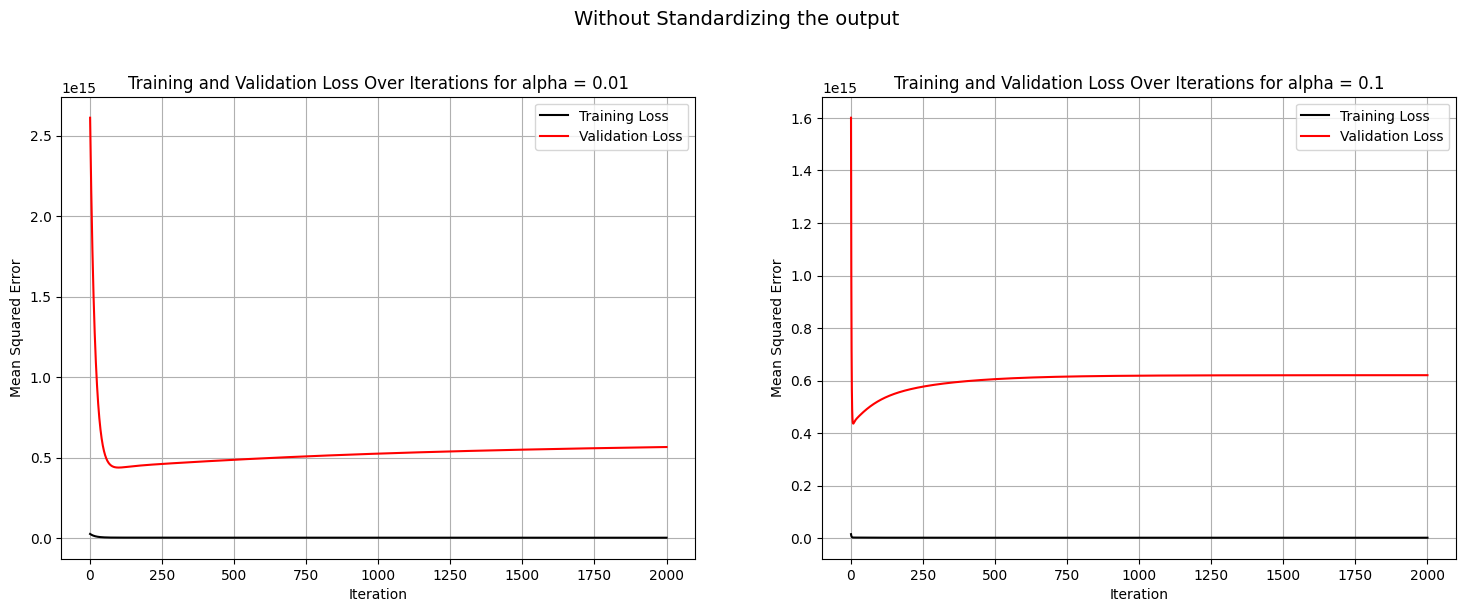

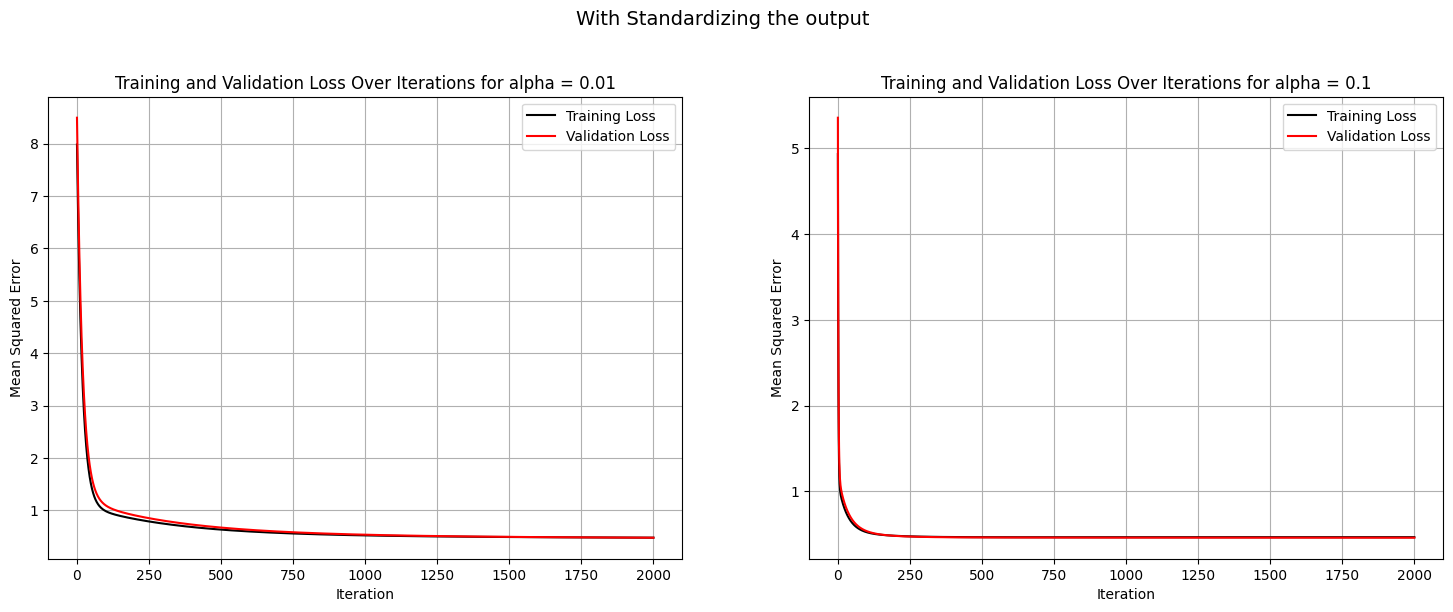

In [104]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input) + 1), train_loss_alpha_standard_input, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input) + 1), val_loss_alpha_standard_input, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1) + 1), train_loss_alpha_standard_input_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1) + 1), val_loss_alpha_standard_input_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard) + 1), train_loss_alpha_standard, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard) + 1), val_loss_alpha_standard, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1) + 1), train_loss_alpha_standard_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1) + 1), val_loss_alpha_standard_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [105]:
train_loss_alpha_normal[-1], train_loss_alpha_normal_1[-1], train_loss_alpha_standard[-1], train_loss_alpha_standard_1[-1]

(0.022630077173887393,
 6.720775914789039,
 0.481552124506142,
 0.4654176844995071)

In [106]:
val_loss_alpha_normal[-1], val_loss_alpha_normal_1[-1], val_loss_alpha_standard[-1], val_loss_alpha_standard_1[-1]


(0.02568757712607497,
 6.751802464805668,
 0.4805978639454511,
 0.4590644013612478)

In [107]:
for i in theta_alpha_standard_1:
  for j in i:
    print(j)


-1.2761686041339548
2.614286322159874
0.2888913330209585
2.0554390311998247
0.8468168122917819
0.5368859790222911


In [108]:
normalizer_input_2 = MinMaxScaler()
normalizer_output_2 = MinMaxScaler()
standardizer_input_2 = StandardScaler()
standardizer_output_2 = StandardScaler()

X_train_normalize_2 = normalizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_normalize_2 = normalizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_normalize_2 = normalizer_input_2.transform(df_test_2[input_features_2])
y_test_normalize_2 = normalizer_output_2.transform(df_test_2[[output_features_2]])

X_train_standard_2 = standardizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_standard_2 = standardizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_standard_2 = standardizer_input_2.transform(df_test_2[input_features_2])
y_test_standard_2 = standardizer_output_2.transform(df_test_2[[output_features_2]])



In [110]:
theta_alpha_normal_input_2, train_loss_alpha_normal_input_2, val_loss_alpha_normal_input_2 = Linear_Regression(X_train_normalize_2,
                                                                                                              y_train_2,
                                                                                                              X_test_normalize_2,
                                                                                                              y_val_2 ,1000, alpha = 0.01)
theta_alpha_normal_input_1_2, train_loss_alpha_normal_input_1_2, val_loss_alpha_normal_input_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_normalize_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_normal_2, train_loss_alpha_normal_2, val_loss_alpha_normal_2 = Linear_Regression(X_train_normalize_2,
                                                                                            y_train_normalize_2,
                                                                                            X_test_normalize_2,
                                                                                            y_test_normalize_2 ,1000, alpha = 0.01)
theta_alpha_normal_1_2, train_loss_alpha_normal_1_2, val_loss_alpha_normal_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                   y_train_normalize_2,
                                                                                                   X_test_normalize_2,
                                                                                                   y_test_normalize_2, 1000, alpha=0.1)

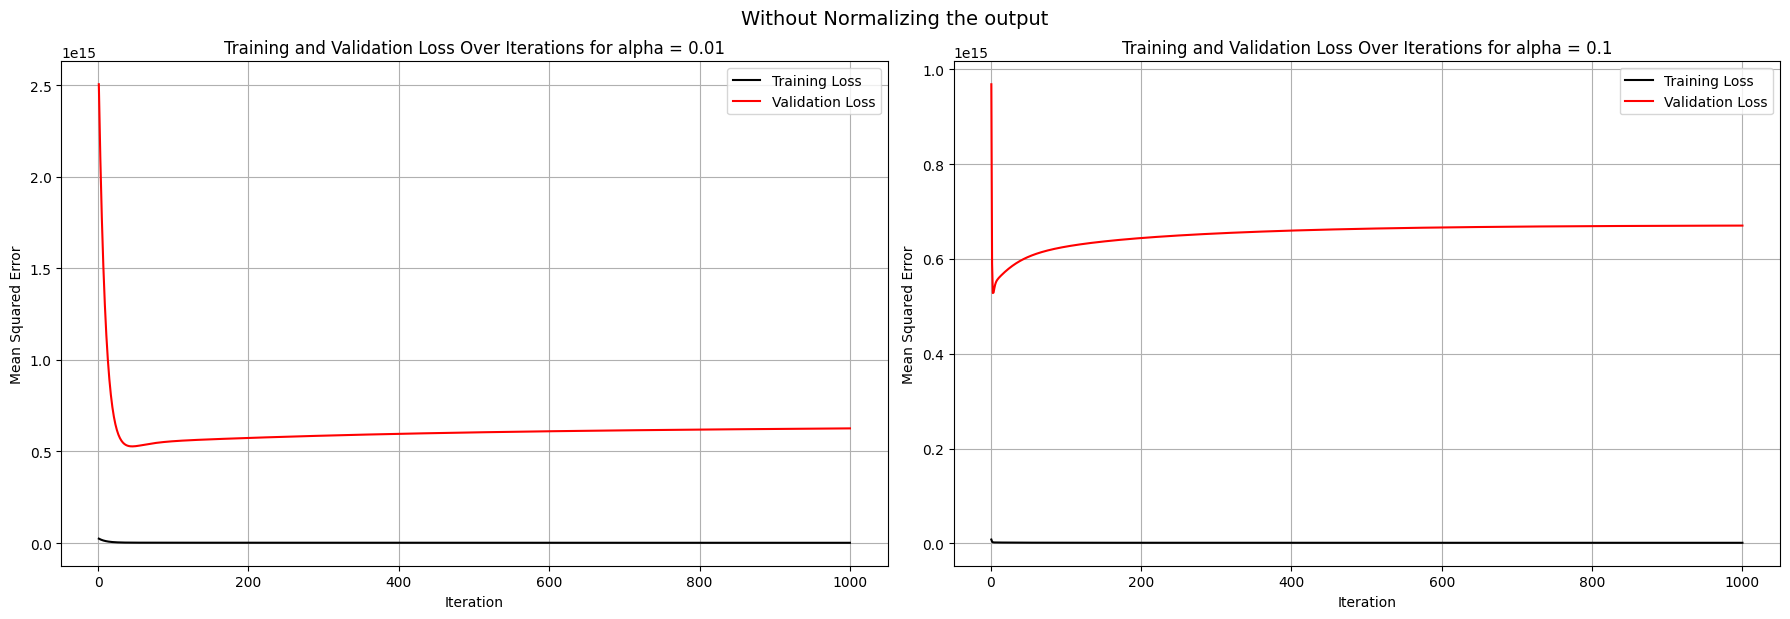

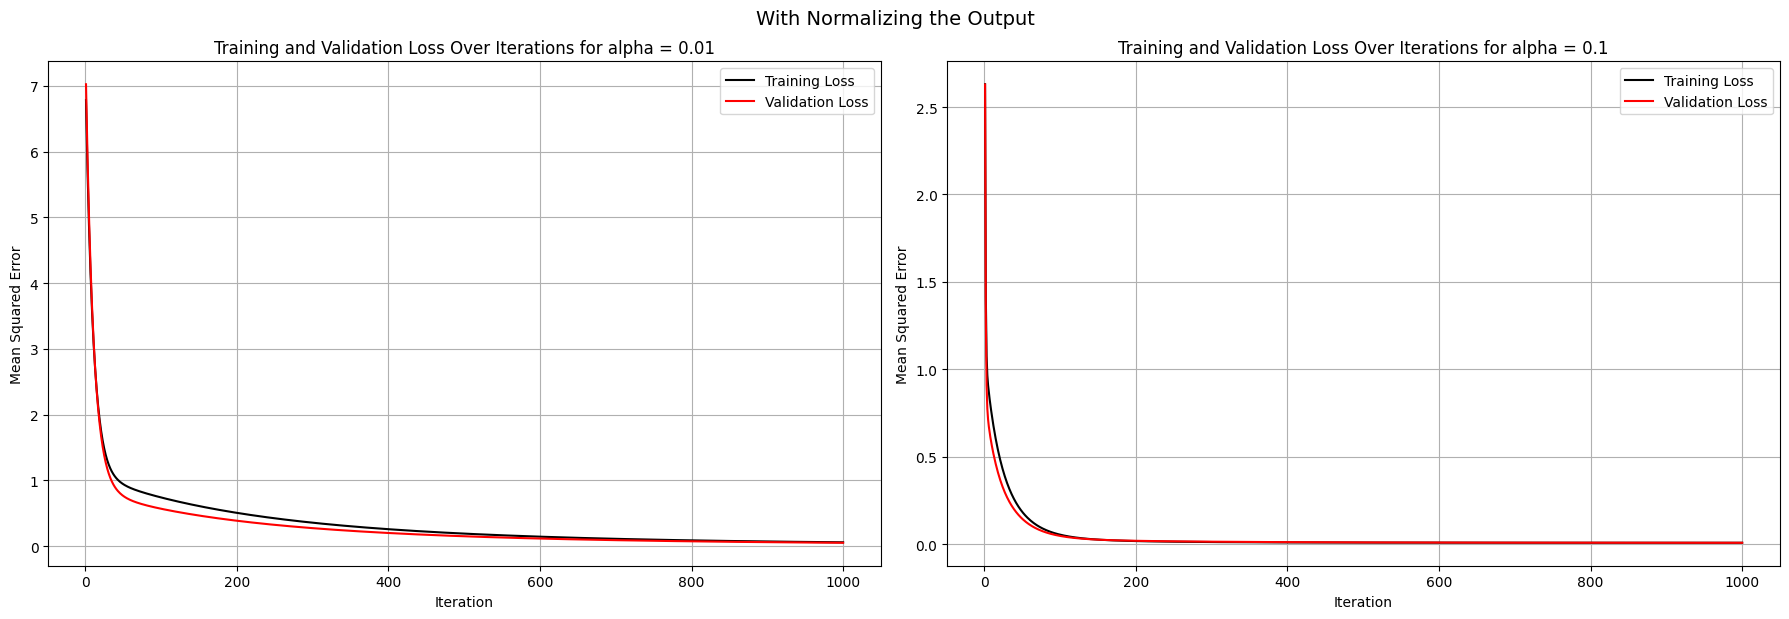

In [111]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input_2) + 1), train_loss_alpha_normal_input_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_2) + 1), val_loss_alpha_normal_input_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1_2) + 1), train_loss_alpha_normal_input_1_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1_2) + 1), val_loss_alpha_normal_input_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_2) + 1), train_loss_alpha_normal_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_2) + 1), val_loss_alpha_normal_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1_2) + 1), train_loss_alpha_normal_1_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1_2) + 1), val_loss_alpha_normal_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()

In [113]:
theta_alpha_standard_input_2, train_loss_alpha_standard_input_2, val_loss_alpha_standard_input_2 = Linear_Regression(X_train_standard_2,
                                                                                                               y_train_2,
                                                                                                               X_test_standard_2,
                                                                                                               y_val_2,1000, alpha = 0.01)
theta_alpha_standard_input_1_2, train_loss_alpha_standard_input_1_2, val_loss_alpha_standard_input_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_standard_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_standard_2, train_loss_alpha_standard_2, val_loss_alpha_standard_2 = Linear_Regression(X_train_standard_2,
                                                                                             y_train_standard_2,
                                                                                             X_test_standard_2,
                                                                                             y_test_standard_2, 500, alpha = 0.01)
theta_alpha_standard_1_2, train_loss_alpha_standard_1_2, val_loss_alpha_standard_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                   y_train_standard_2,
                                                                                                   X_test_standard_2,
                                                                                                   y_test_standard_2, 500, alpha = 0.1)


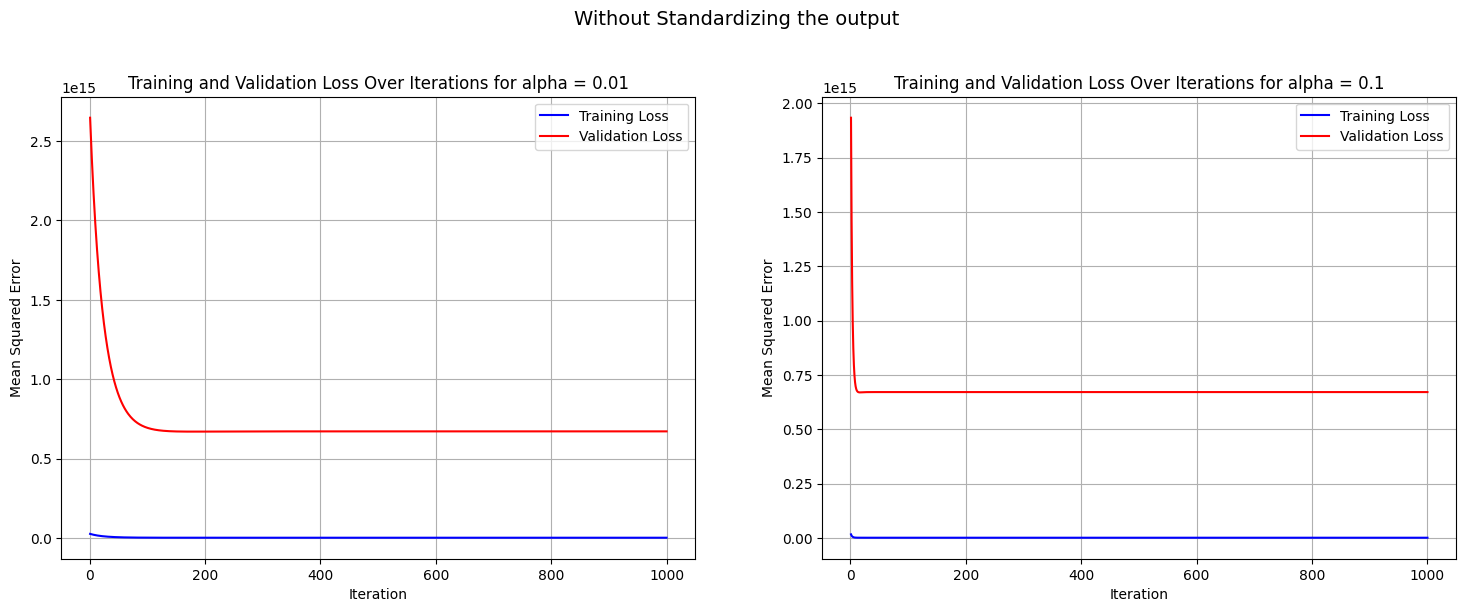

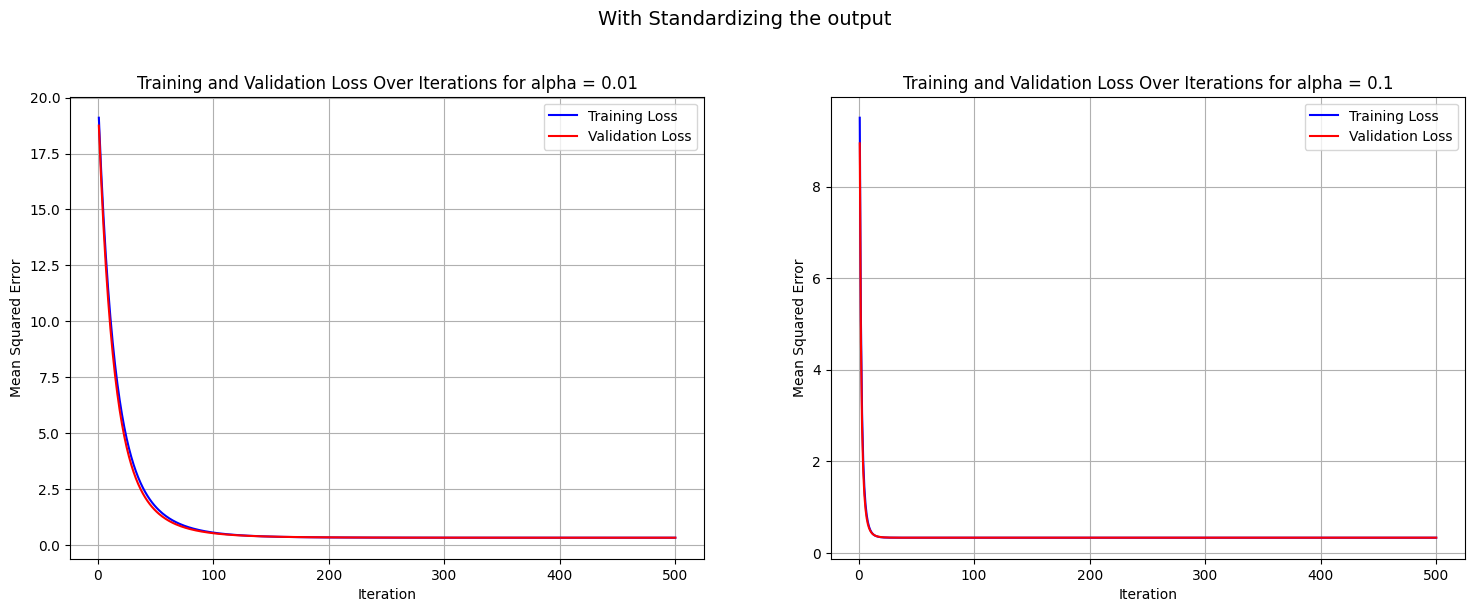

In [115]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input_2) + 1), train_loss_alpha_standard_input_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_2) + 1), val_loss_alpha_standard_input_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1_2) + 1), train_loss_alpha_standard_input_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1_2) + 1), val_loss_alpha_standard_input_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_2) + 1), train_loss_alpha_standard_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_2) + 1), val_loss_alpha_standard_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1_2) + 1), train_loss_alpha_standard_1_2, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1_2) + 1), val_loss_alpha_standard_1_2, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()


In [117]:
train_loss_alpha_normal_2[-1], train_loss_alpha_normal_1_2[-1], train_loss_alpha_standard_2[-1], train_loss_alpha_standard_1_2[-1]


(0.05611110951743309,
 0.009190208183444072,
 0.33093783163246776,
 0.3309208502985197)

In [119]:
val_loss_alpha_normal_2[-1], val_loss_alpha_normal_1_2[-1], val_loss_alpha_standard_2[-1], val_loss_alpha_standard_1_2[-1]


(0.048760372913051464,
 0.008994025302430956,
 0.3320770615669881,
 0.3322934350296885)

In [121]:
for i in theta_alpha_standard_1_2:
  for j in i:
    print(j)

8.500237787161034e-17
0.2856881620333086
0.03899116054616521
0.3101673797125565
0.1971012694024973
0.11275374471720606
0.07830662685063434
0.07796695550393973
0.10989171633049338
0.21441638830163173
0.11929555325158073
0.13711064832709655


In [123]:
theta_lambda_0, train_loss_lambda_0, val_loss_lambda_0 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 0)


theta_lambda_1, train_loss_lambda_1, val_loss_lambda_1 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_5, train_loss_lambda_5, val_loss_lambda_5 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 5)
theta_lambda_10, train_loss_lambda_10, val_loss_lambda_10 = Linear_Regression(X_train_normalize,
                                                                            y_train_normalize,
                                                                            X_test_normalize,
                                                                            y_test_normalize, 2000, alpha = 0.1, lambdaa = 10)



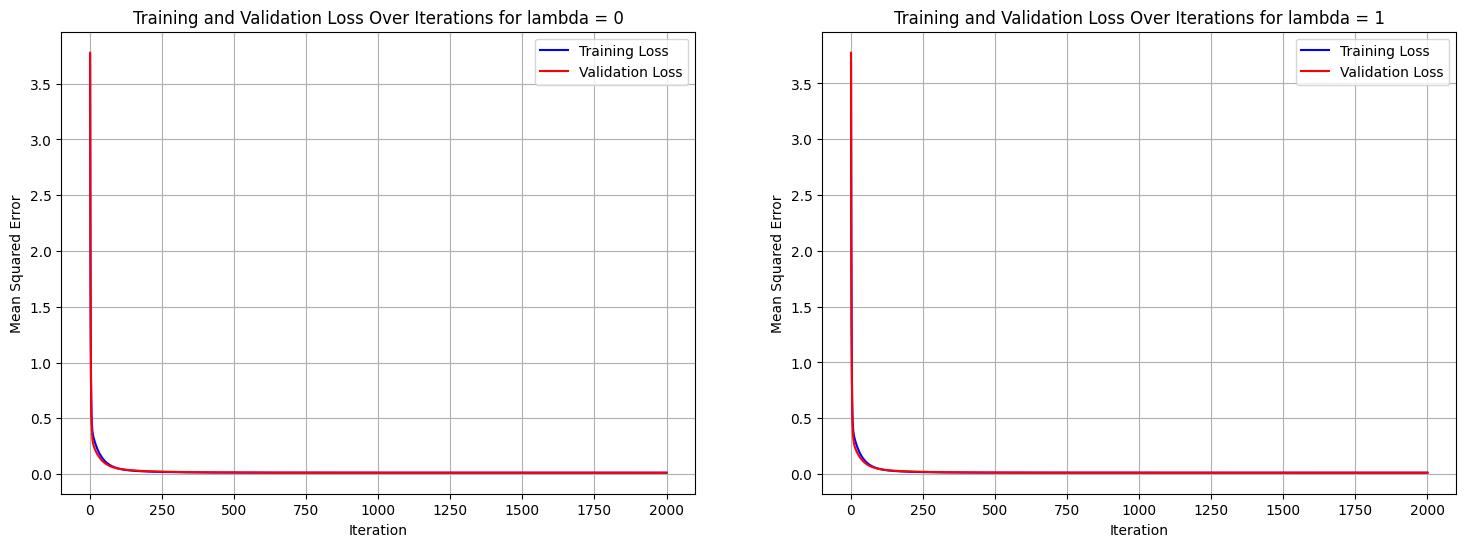

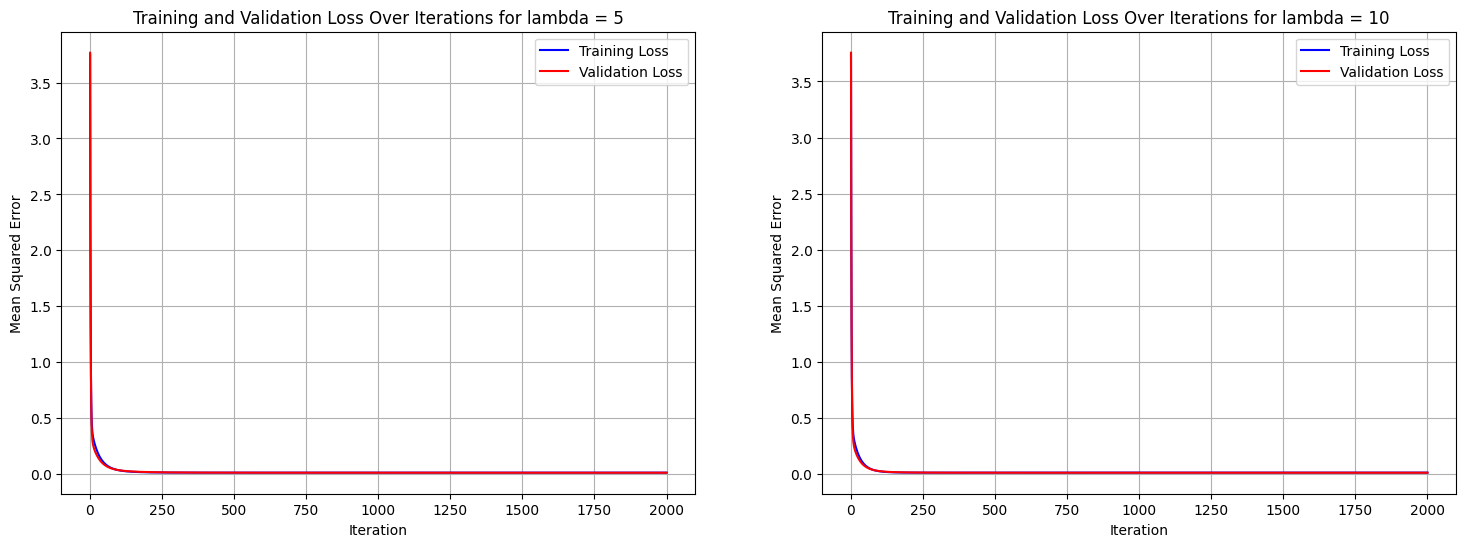

In [125]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_0) + 1), train_loss_lambda_0, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_0) + 1), val_loss_lambda_0, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_1) + 1), train_loss_lambda_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_1) + 1), val_loss_lambda_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_5) + 1), train_loss_lambda_5, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_5) + 1), val_loss_lambda_5, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_10) + 1), train_loss_lambda_10, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_10) + 1), val_loss_lambda_10, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()

In [127]:
train_loss_lambda_0[-1], train_loss_lambda_1[-1], train_loss_lambda_5[-1], train_loss_lambda_10[-1]


(0.012137069078371822,
 0.012083091380549544,
 0.012472051715665409,
 0.013261403248902924)

In [129]:
val_loss_lambda_0[-1], val_loss_lambda_1[-1], val_loss_lambda_5[-1], val_loss_lambda_10[-1]

(0.011984965057254774,
 0.01175084787497417,
 0.011705140803512596,
 0.01227028732948862)

In [131]:
for i in theta_lambda_5:
  for j in i:
    print(i)

[0.08730806]
[0.28287278]
[0.06512339]
[0.24530438]
[0.13551408]
[0.10297449]


In [133]:
theta_lambda_2_0, train_loss_lambda_2_0, val_loss_lambda_2_0 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 0)


theta_lambda_2_1, train_loss_lambda_2_1, val_loss_lambda_2_1 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_2_5, train_loss_lambda_2_5, val_loss_lambda_2_5 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 5)

theta_lambda_2_10, train_loss_lambda_2_10, val_loss_lambda_2_10 = Linear_Regression(X_train_normalize_2,
                                                                                    y_train_normalize_2,
                                                                                    X_test_normalize_2,
                                                                                    y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 10)



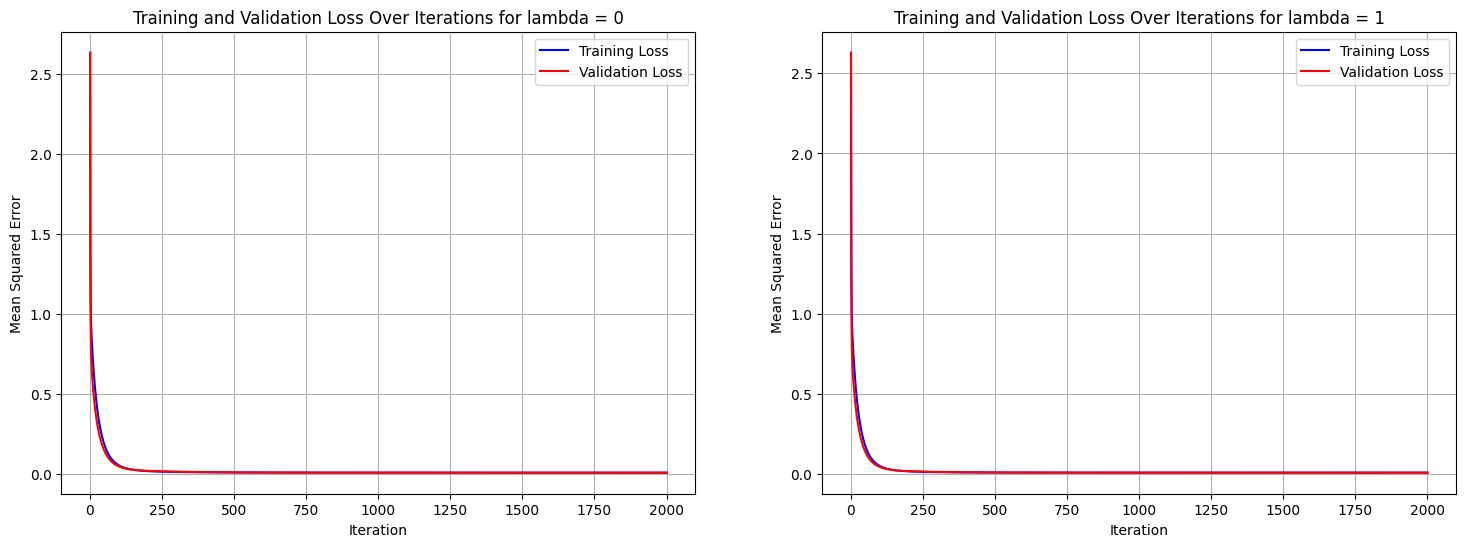

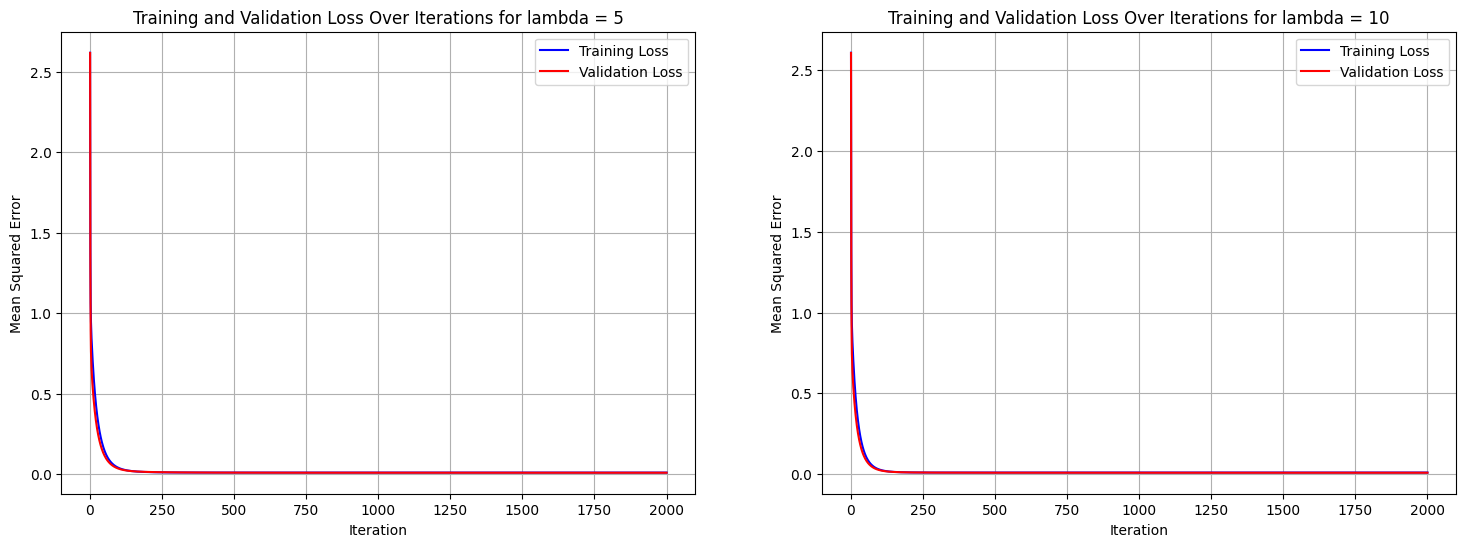

In [135]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_2_0) + 1), train_loss_lambda_2_0, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_0) + 1), val_loss_lambda_2_0, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_2_1) + 1), train_loss_lambda_2_1, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_1) + 1), val_loss_lambda_2_1, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_2_5) + 1), train_loss_lambda_2_5, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_5) + 1), val_loss_lambda_2_5, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_2_10) + 1), train_loss_lambda_2_10, color='blue', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_10) + 1), val_loss_lambda_2_10, color='red', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()

In [137]:
train_loss_lambda_2_0[-1], train_loss_lambda_2_1[-1], train_loss_lambda_2_5[-1], train_loss_lambda_2_10[-1]


(0.009119244908372282,
 0.00908244988822188,
 0.009331518330461537,
 0.009833120068109366)

In [138]:
val_loss_lambda_2_0[-1], val_loss_lambda_2_1[-1], val_loss_lambda_2_5[-1], val_loss_lambda_2_10[-1]

(0.008679991479177609,
 0.00852181501950358,
 0.008447320248163755,
 0.008727668295105248)